<a href="https://colab.research.google.com/github/LeeSeungYun1020/Machine_Learning/blob/main/colab/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 결정 트리

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import graphviz

In [6]:
from sklearn.datasets import load_iris, load_boston
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

## 분류

In [8]:
iris = load_iris()

### 전처리 없이 학습

In [9]:
model = DecisionTreeClassifier()
cross_val_score(estimator=model, X=iris.data, y=iris.target, cv=5)

array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

### 전처리 후 학습

In [11]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)
cross_val_score(estimator=model, X=iris.data, y=iris.target, cv=5)

array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

### 시각화

In [12]:
model = DecisionTreeClassifier()
model.fit(iris.data, iris.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
from sklearn import tree
r = tree.export_text(decision_tree = model, feature_names=iris.feature_names)
print(r)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

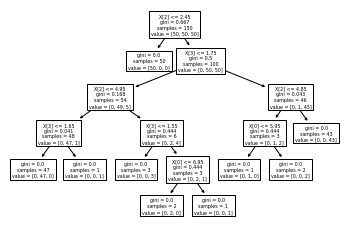

In [17]:
tree.plot_tree(model)

In [20]:
vis_data = tree.export_graphviz(
    decision_tree=model, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names, 
    filled=True, 
    rounded=True,
    special_characters=True)

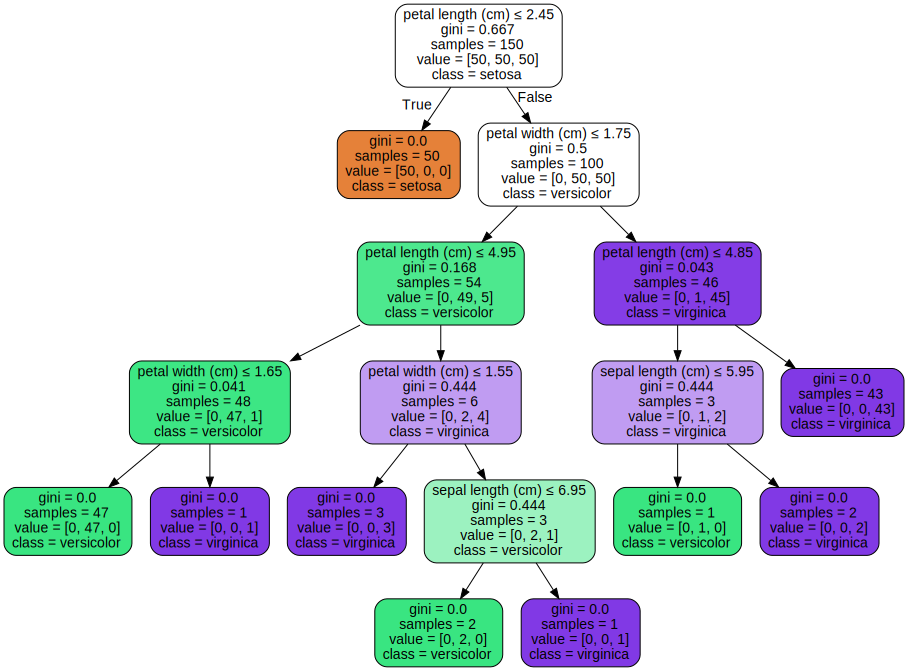

In [21]:
graphviz.Source(vis_data)

## 회귀

In [34]:
boston = load_boston()

### 전처리 없이 학습

In [42]:
model = DecisionTreeRegressor()
cross_val_score(model, boston.data, boston.target, cv=5)

array([ 0.61465284,  0.60167649,  0.64054529,  0.36115298, -1.53624014])

### 전처리 후 학습

In [38]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)
cross_val_score(model, boston.data, boston.target, cv=5)

array([ 0.63823209,  0.60888716,  0.60433847,  0.39243904, -0.98880622])

### 시각화

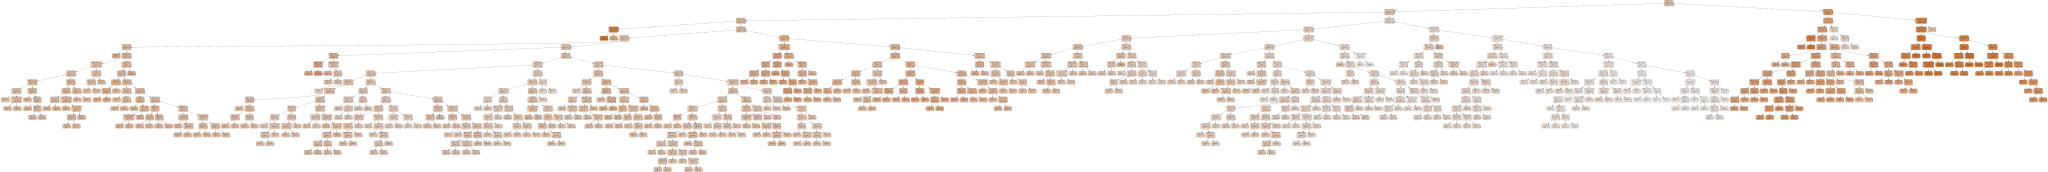

In [45]:
model = DecisionTreeRegressor()
model.fit(boston.data, boston.target)
vis_data = tree.export_graphviz(
    decision_tree=model, 
    feature_names=boston.feature_names,
    filled=True, 
    rounded=True,
    special_characters=True)
graphviz.Source(vis_data)

# 랜덤 포레스트

In [46]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_validate

In [47]:
iris = load_iris()

## 분류

### 전처리 없이

In [48]:
model = RandomForestClassifier()
cross_validate(model, iris.data, iris.target, cv =5)

{'fit_time': array([0.12882566, 0.13504195, 0.12543464, 0.12137914, 0.13247132]),
 'score_time': array([0.00848341, 0.00793147, 0.00776362, 0.00776649, 0.00912404]),
 'test_score': array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])}

### 전처리

In [50]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)
cross_validate(model, iris.data, iris.target, cv =5)

{'fit_time': array([0.15001178, 0.12396264, 0.12315011, 0.12678981, 0.12530899]),
 'score_time': array([0.00793219, 0.00780535, 0.00794387, 0.00839758, 0.00793099]),
 'test_score': array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])}

## 회귀

### 전처리 없이

In [56]:
model = RandomForestRegressor(max_depth=10)
cross_validate(model, boston.data, boston.target, cv =5)

{'fit_time': array([0.27942157, 0.2769134 , 0.283571  , 0.28136754, 0.2922411 ]),
 'score_time': array([0.0079267 , 0.008044  , 0.00919104, 0.00965524, 0.00767398]),
 'test_score': array([0.76805858, 0.83963519, 0.75251273, 0.48743073, 0.21811853])}

### 전처리

In [57]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(max_depth=10)
)
cross_validate(model, boston.data, boston.target, cv =5)

{'fit_time': array([0.26996326, 0.27456093, 0.27619624, 0.26455641, 0.27822113]),
 'score_time': array([0.0075767 , 0.00788212, 0.00782084, 0.00760984, 0.00767159]),
 'test_score': array([0.75159453, 0.86073758, 0.73330517, 0.46331691, 0.35465674])}